For a particle in a box, the energy eigenvalues of a single particle state are given by $\epsilon_{k} = \frac{\pi^{2}}{2} (k+1)^2$ in atomic units, $L = 1$ and for $k = 0, 1, \dots$  with $k = 0$ being the ground state of the system.

This gives a simple $\frac{(k+1)^2}{2}$ relation if we write energy in terms of $\pi^2$.

Thus $\epsilon_{0} = 0.5, \epsilon_{1} = 2, \epsilon_{2} = 4.5$ etc 

This energy eigenvalue solves equation $H_{s}\psi_{k} = \epsilon_{k}\psi_{k}$. 

However when calling `iDEA.methods.interacting.solve`, the energy given out is the eigenvalue of $H_{MB} \phi = E_{k} \phi$, but for a system like a particle in a box, we know that analytically the ground state should be $E_{0} = 2\epsilon_{0}= 1$ and can draw out other states.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA

# run variables

points = 250
num_of_states = 10

# initalise the system

l = 1
x = np.linspace(0, l, points)
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")
pib_double = iDEA.system.System(x, v_ext, v_int, electrons = "ud")

In [19]:
# initalise the arrays

energies_int = []
energies_single = []
energies_errors = []
occupied_levels = {}

# solve for the state and extract the energy
for i in range(num_of_states):
    orbital_energy = []
    # methods using pib_single
    s = iDEA.methods.interacting.solve(pib_single, k=i)
    energies_single.append(np.round((s.energy / (np.pi)**2), decimals=4))

    # methods using pib_double
    j = iDEA.methods.interacting.solve(pib_double, k=i)
    energies_int.append(np.round((j.energy / (np.pi)**2), decimals=4))
    
    t = iDEA.methods.non_interacting.solve(pib_double, k=i)
    energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
    energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
    up_occ_index = t.up.occupied # index of occupied orbitals
    down_occ_index = t.down.occupied
    # up_occ = t.up.occupations # full array of occupations
    # down_occ = t.down.occupations

    for index in up_occ_index:
        orbital_energy.append(energies_up[index])

    for index in down_occ_index:
        orbital_energy.append(energies_down[index])

    energy_sum = np.sum(orbital_energy)
    
    occupied_levels[f"State = {i}"] = (f"Orbitals occupied by up: {up_occ_index}", f"Orbitals occupied by down: {down_occ_index}", \
                                       f"Energy of occupied orbitals: {orbital_energy}", f"Total energy = {energy_sum}")
    
    
    energies_errors.append(abs( (((i+1)**2)/2) - np.round((s.energy / (np.pi)**2), decimals=4)))
    # state = iDEA.methods.non_interacting.solve(pib, k=i)
    # e = iDEA.methods.non_inte(np.round((j.energy / (np.pi)**2), decimals=4))racting.total_energy(pib, state)
    # energies_non_int.append(e)
print("Done")


iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 0.0, tolerance = 1e-10
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 0.0, tolerance = 1e-10
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 0.0, tolerance = 1e-10
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 0.0, tolerance = 1e-10
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 0.0, tolerance = 1e-10
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.intera

**All above are the initalisation and calculations etc**

In [20]:
for key, value in occupied_levels.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.4929, 0.4929]', 'Total energy = 0.9858')
---
State = 1: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.4929, 1.9717]', 'Total energy = 2.4646')
---
State = 2: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [1.9717, 0.4929]', 'Total energy = 2.4646')
---
State = 3: ('Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [1.9717, 1.9717]', 'Total energy = 3.9434')
---
State = 4: ('Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [4.4363, 0.4929]', 'Total energy = 4.9292')
---
State = 5: ('Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.4929, 4.4363]', 'Total energy = 4.9292')
---
State = 6: ('Orbitals occupied by up: [2]', 'Orbitals occupied b

**Main Results**

As seen above, the reason why we are getting degenerate energies is because iDEA is placing the up and down electrons in either the same orbitals for the state (i.e. state 8 and 9), or a degenerate configuration (i.e. state 1 and 2).

Calling `interacting.solve()` and `non-interacting.solve()` leads to the same $E_{k}$ as seen in the `Total energy` column of the dictionary

In [21]:
# print results

print("Energies of interacting method 'ud'")
for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'")
for i, value in enumerate(energies_single):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")
    

Energies of interacting method 'ud'
State = 0, energy = 0.9858 per pi squared
State = 1, energy = 2.4646 per pi squared
State = 2, energy = 2.4646 per pi squared
State = 3, energy = 3.9433 per pi squared
State = 4, energy = 4.9292 per pi squared
State = 5, energy = 4.9292 per pi squared
State = 6, energy = 6.4079 per pi squared
State = 7, energy = 6.4079 per pi squared
State = 8, energy = 8.3796 per pi squared
State = 9, energy = 8.3796 per pi squared

Energies of interacting method 'u'
State = 0, energy = 0.4929 per pi squared
State = 1, energy = 1.9717 per pi squared
State = 2, energy = 4.4363 per pi squared
State = 3, energy = 7.8867 per pi squared
State = 4, energy = 12.3229 per pi squared
State = 5, energy = 17.745 per pi squared
State = 6, energy = 24.153 per pi squared
State = 7, energy = 31.5467 per pi squared
State = 8, energy = 39.9263 per pi squared
State = 9, energy = 49.2918 per pi squared

Errors
State = 0, error = 0.007099999999999995 per pi squared
State = 1, error = 0.

The errors seem to get larger as the state increases from the true value.

In [22]:
# print the degenerate states

for i in range(len(energies_int)):
    if energies_int[i] == energies_int[i-1]:
        print(f"State {i-1} and {i} have the same energy")

State 1 and 2 have the same energy
State 4 and 5 have the same energy
State 6 and 7 have the same energy
State 8 and 9 have the same energy


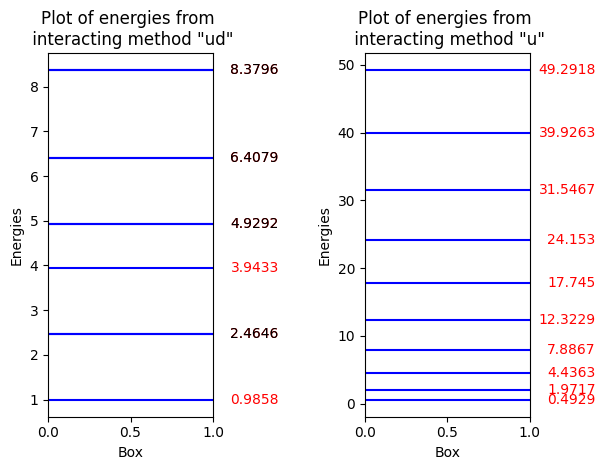

In [23]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)

for i, value in enumerate(energies_int):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_int[i] == energies_int[i-1]:
        ax1.text(x=1.4, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "ud"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.show()

The plot on the left are the energies with the degenerate states being labelled in black, the plot on the right are the orbital energies 

**Conclusion**

I may be fundamentally misunderstanding the theory here.

But the errors are quite large as compared to the theory predicted results ($\epsilon_{k} = \frac{(k+1)^{2}}{2})$)

And while there seems to be an ordering of $E_{k}$, there are seemingly random states that are degenerate because iDEA places the electrons in the same configuration per state. 

Further investigations will include seeing what states get occupied visually through plotting, and if things change drastically with different electron configurations i.e. "uu", "uud". 

This may be the multiplets that are the point of investigation.